## Test Function
Testing with [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function).

$$f(x,y) = (x^2+y-11)^2+(x+y^2-7)^2$$

Its partial derivatives:

$$\frac{\partial f}{\partial x} = 4x^3-4xy-42x+4xy-14$$
$$\frac{\partial f}{\partial y} = 4y^3+2x^2-26y+4xy-22$$


In [1]:
def gradient_descent(learning_rate = 0.001, iteration = 1000, x_initial = 0, y_initial = 0):
    for i in range(iteration):
        if i == 0:
            x = x_initial
            y = y_initial
            z = (x_initial**2+y_initial-11)**2+(x_initial+y_initial**2-7)**2
            
            x_vals = [x]
            y_vals = [y]
            z_vals = [z]
        
        # partial derivatives
        dx = 4*x**3-4*x*y-42*x+4*x*y-14
        dy = 4*y**3+2*x**2-26*y+4*x*y-22
        
        # updates
        x = x-learning_rate*dx
        y = y-learning_rate*dy
        z = (x**2+y-11)**2+(x+y**2-7)**2+10
        
        # record steps
        x_vals.append(x)
        y_vals.append(y)
        z_vals.append(z)
        
        steps = {
            'x_vals': x_vals,
            'y_vals': y_vals,
            'z_vals': z_vals
        }
    return(steps)

## Gradient Descent with Momentum
   
    vdx = 0
    vdy = 0

On iteration $i$:  

- Compute $dx$ and $dy$  
- $vdx = \beta*vdx + dx$  
- $vdy = \beta*vdy + dy$
- $x = x - \alpha*vdx$  
- $y = y - \alpha*vdy$

In [2]:
def gradient_descent_with_momentum(learning_rate = 0.001, iteration = 1000, x_initial = 0, y_initial = 0, beta = 0.9):
    vdx = 0
    vdy = 0
    for i in range(iteration):
        if i == 0:
            x = x_initial
            y = y_initial
            z = (x_initial**2+y_initial-11)**2+(x_initial+y_initial**2-7)**2
            
            x_vals = [x]
            y_vals = [y]
            z_vals = [z]
        
        # partial derivatives
        dx = 4*x**3-4*x*y-42*x+4*x*y-14
        dy = 4*y**3+2*x**2-26*y+4*x*y-22
        
        # momentum
        vdx = beta * vdx + dx
        vdy = beta * vdy + dy
        
        # updates
        x = x-learning_rate*vdx
        y = y-learning_rate*vdy
        z = (x**2+y-11)**2+(x+y**2-7)**2+10
        
        # record steps
        x_vals.append(x)
        y_vals.append(y)
        z_vals.append(z)
        
        steps = {
            'x_vals': x_vals,
            'y_vals': y_vals,
            'z_vals': z_vals
        }
    return(steps)

## Plotting

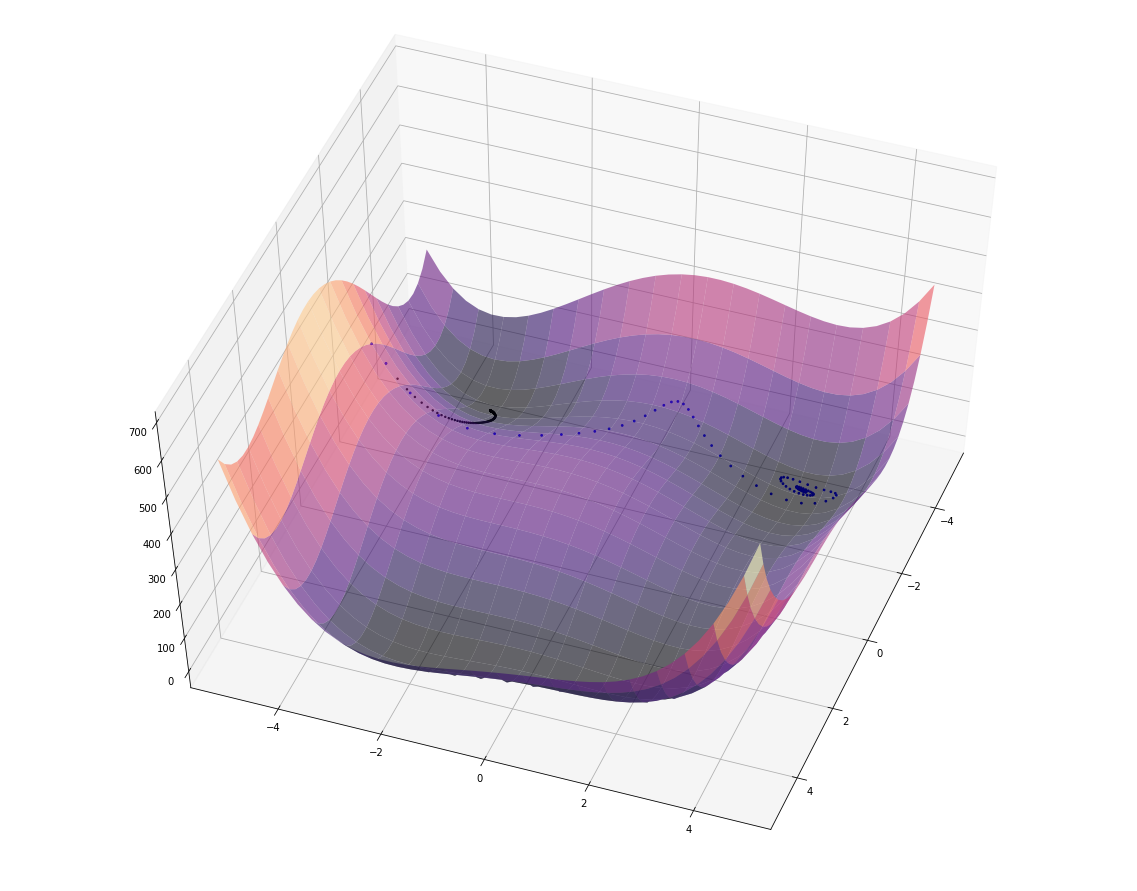

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import math

fig = plt.figure()
ax = fig.gca(projection='3d')

# make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X**2+Y-11)**2+(X+Y**2-7)**2

# Plot the surface
surf = ax.plot_surface(X, Y, Z,
                       linewidth = 0,
                       alpha = 0.6,
                       rstride = 2, cstride = 2,
                       cmap=cm.magma
                      )

# adding gradient descent steps
gd1 = gradient_descent(x_initial = -1, y_initial = -4.5)
ax.scatter(gd1['x_vals'], gd1['y_vals'], gd1['z_vals'], c = 'black', marker='o', alpha = 1, s = 2)

gd2 = gradient_descent_with_momentum(x_initial = -1, y_initial = -4.5, beta = 0.9)
ax.scatter(gd2['x_vals'], gd2['y_vals'], gd2['z_vals'], c = 'blue', marker = 'o', alpha = 1, s = 3)


ax.view_init(elev = 55, azim = 20)
plt.rc('figure', figsize=(20, 16))